# Derivatives Analytics - Introduction to Object Oriented Programming

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#executive-summary)

**TODO**

### **Resources**: 

**TODO**

# Executive Summary <a name="executive-summary"></a>

**Make intro**

The following sections are organized as follows:

- **TODO**

These are the basic imports that we need to work with NumPy, Pandas and to plot data using Matplotlib functionalities

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for statistical functions
from scipy import stats

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# for some mathematical functions
import math

# Introduction to dates management: `datetime` module <a name="introduction-to-dates"></a>

In [2]:
# for date management
import datetime as dt

In [3]:
today = dt.datetime.today()
today

datetime.datetime(2020, 4, 25, 21, 45, 26, 722338)

In [4]:
type(today)

datetime.datetime

In [5]:
my_birthday = dt.datetime(year=1988,month=6,day=1)
my_birthday

datetime.datetime(1988, 6, 1, 0, 0)

In [6]:
type(my_birthday)

datetime.datetime

In [7]:
time_to_date = today - my_birthday
time_to_date

datetime.timedelta(days=11651, seconds=78326, microseconds=722338)

In [8]:
type(time_to_date)

datetime.timedelta

In [9]:
time_to_date.days

11651

In [10]:
time_to_date.days/365

31.92054794520548

In [11]:
date_string = "18-04-2020"
date_string

'18-04-2020'

In [12]:
type(date_string)

str

In [13]:
isinstance(date_string, str)

True

In [14]:
date = dt.datetime.strptime(date_string, "%d-%m-%Y")
date

datetime.datetime(2020, 4, 18, 0, 0)

In [15]:
type(date)

datetime.datetime

In [16]:
isinstance(date, dt.datetime)

True

In [17]:
date_string_from_dt = date.strftime("%d-%m-%Y")
date_string_from_dt

'18-04-2020'

In [18]:
type(date_string_from_dt)

str

In [19]:
isinstance(date_string_from_dt, str)

True

In [20]:
date + dt.timedelta(days=25)

datetime.datetime(2020, 5, 13, 0, 0)

## Non-financial Introduction to OOP <a name="non-financial-introduction-to-oop"></a>

### Without OOP: a person <a name="nonoopperson"></a> 

In [21]:
def say_your_name(name, surname):
    print("My name is {} {}".format(name, surname))

In [22]:
my_name = "Gabriele"
my_surname = "Pompa"

In [23]:
say_your_name(name=my_name, surname=my_surname)

My name is Gabriele Pompa


In [24]:
def say_country_of_birth(country):
    print("My country of birth is {}".format(country))

In [25]:
my_country = "Italy"

In [26]:
say_country_of_birth(my_country)

My country of birth is Italy


In [27]:
def compute_age(birthdate):
    
    today = dt.datetime.today()  
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    if today >= next_birthday:
        age = today.year - birthdate.year
    else:
        age = today.year - birthdate.year - 1
        
    return age

In [28]:
my_birthdate = "01-06-1988"
my_birthdate

'01-06-1988'

In [29]:
my_age = compute_age(birthdate=my_birthdate)
my_age

31

In [30]:
def time_to_birthday(birthdate):
    
    today = dt.datetime.today()
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    return (next_birthday - today).days

In [31]:
days_to_birthday = time_to_birthday(my_birthdate)
days_to_birthday

36

### With OOP: the `Person` class <a name="oopperson"></a> 

In [32]:
class Person(object):
    """
    Person class implementing some typical features of a person.
    
    Attributes:
    -----------
        name (str):                   name string;
        surname (str):                surname string;
        country (str):                country of birth;
        birthdate (str; dt.datetime): date of birth. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        age (int):                    age, as computed by compute_age() method.
    
    Methods:
    --------
        say_your_name: (returns) None
            Prints name and surname.
            
        say_country_of_birth: None
            Prints country of birth.
            
        compute_age: int
            Computes the age, sets self.age attribute and returns it.
            
        time_to_birthday: int
            Computes the number of days left untill next birthdat and return the number.
    
    """
    
    def __init__(self, p_name, p_surname, p_country, p_birthdate):
        self.name      = p_name
        self.surname   = p_surname
        self.country   = p_country
        self.birthdate = dt.datetime.strptime(p_birthdate, "%d-%m-%Y") if isinstance(p_birthdate, str) else p_birthdate
        self.age       = None
    
    def say_your_name(self):
        print("My name is {} {}".format(self.name, self.surname))
        
    def say_country_of_birth(self):
        print("My country of birth is {}".format(self.country))
        
    def compute_age(self):
    
        today = dt.datetime.today()  

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        if today >= next_birthday:
            self.age = today.year - self.birthdate.year
        else:
            self.age = today.year - self.birthdate.year - 1

        return self.age 
    
    def time_to_birthday(self):

        today = dt.datetime.today()

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        return (next_birthday - today).days

In [33]:
gab = Person(p_name = "Gabriele", 
             p_surname = "Pompa", 
             p_country = "Italy", 
             p_birthdate = "01-06-1988")

In [34]:
type(gab)

__main__.Person

In [35]:
gab.name

'Gabriele'

In [36]:
gab.surname

'Pompa'

In [37]:
gab.say_your_name()

My name is Gabriele Pompa


In [38]:
gab.country

'Italy'

In [39]:
gab.say_country_of_birth()

My country of birth is Italy


In [40]:
gab.birthdate

datetime.datetime(1988, 6, 1, 0, 0)

In [41]:
gab.birthdate.strftime("%d-%m-%Y")

'01-06-1988'

In [42]:
gab.age is None

True

In [43]:
gab.compute_age()

31

In [44]:
gab.age

31

In [45]:
gab.time_to_birthday()

36

In [46]:
bill = Person(p_name = "Bill", 
              p_surname = "Gates", 
              p_country = "USA", 
              p_birthdate = "28-10-1955")

In [47]:
type(bill)

__main__.Person

In [48]:
bill.say_your_name()

My name is Bill Gates


## Introduction to OOP: Black-Scholes option pricer <a name="BS-option-pricer"></a>

### Without OOP: a call priced using Black-Scholes model <a name="nonoopperson"></a> 

In [49]:
def call_option_payoff(S,K):
    """
    call_option_payoff(S,K) computes returns the payoff of a call option given the spot price of the underlying asset 
    and strike price 'K'.
    
    Parameters:
        S (float): spot price of the underlying asset;
        K (float): strike price;
    
    Returns:
        payoff (float): call option payoff;
    """
    return max(0.0, S - K)


In [50]:
def call_option_price(S, K, tau, r, sigma):
    """
    call_option_price(S, K, tau, r, sigma) computes and returns the exact price of a call option 
    of time to maturity 'tau' and strike price 'K' given the spot price of the underlying asset 'S', 
    the continuosly compounded short-rate 'r' and volatility of the 
    underlying asset 'sigma'.

    Parameters:
        S (float):     spot price of the underlying asset;
        K (float):     strike price;
        tau (float):   time to maturity (in years);
        r (float):     continuously compounded short-rate;
        sigma (float): volatility of underlying asset;
        
    Returns:
        price (float): call price;

    """
    
    if S == 0: # this is to avoid log(0) issues
        return 0.0
    else:
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))

        price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

        return price

In [51]:
def call_upper_limit(S):
    """
    call_upper_limit(S) returns the upper limit for a vanilla call option price, 
    which coincides with the spot price of the underlying asset.

    Parameters:
        S (float):     spot price of the underlying asset;
        
    Returns:
        S (float):     spot price of the underlying asset;

    """
    
    return S

In [52]:
def call_lower_limit(S, K, tau, r):
    """
    call_lower_limit(S, K, tau, r) returns the lower limit for a vanilla call option price.

    Parameters:
        S (float):     spot price of the underlying asset;
        K (float):     strike price;
        tau (float):   time to maturity (in years);
        r (float):     continuously compounded short-rate;
        
    Returns:
        price_lower_limit (float): call lower limit price;

    """
    
    price_lower_limit = max(S - K*np.exp(-short_rate * tau), 0)
    
    return price_lower_limit

In [53]:
K              = 100.0
short_rate     = 0.05 # 5% per year
volatility     = 0.2  # 20% per year

In [54]:
S_strip = np.linspace(80, 120, 100)
S_strip = np.append(S_strip, K)
S_strip = np.sort(S_strip)
S_strip

array([ 80.        ,  80.4040404 ,  80.80808081,  81.21212121,
        81.61616162,  82.02020202,  82.42424242,  82.82828283,
        83.23232323,  83.63636364,  84.04040404,  84.44444444,
        84.84848485,  85.25252525,  85.65656566,  86.06060606,
        86.46464646,  86.86868687,  87.27272727,  87.67676768,
        88.08080808,  88.48484848,  88.88888889,  89.29292929,
        89.6969697 ,  90.1010101 ,  90.50505051,  90.90909091,
        91.31313131,  91.71717172,  92.12121212,  92.52525253,
        92.92929293,  93.33333333,  93.73737374,  94.14141414,
        94.54545455,  94.94949495,  95.35353535,  95.75757576,
        96.16161616,  96.56565657,  96.96969697,  97.37373737,
        97.77777778,  98.18181818,  98.58585859,  98.98989899,
        99.39393939,  99.7979798 , 100.        , 100.2020202 ,
       100.60606061, 101.01010101, 101.41414141, 101.81818182,
       102.22222222, 102.62626263, 103.03030303, 103.43434343,
       103.83838384, 104.24242424, 104.64646465, 105.05

In [55]:
tau_strip = np.array([0.05, 0.1, 0.25, 0.5, 0.75, 1.0])
tau_strip

array([0.05, 0.1 , 0.25, 0.5 , 0.75, 1.  ])

In [56]:
def plot_price_strip(S_list, K, tau_list, r, sigma):
    """
    plot_price_strip(S_list, tau_list) plot call option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        S_list (np.ndarray):   list of underlying values;
        K (float):             strike price
        tau_list (np.ndarray): list of times to maturity (in years);
        r (float):             continuously compounded short-rate;
        sigma (float):         volatility of underlying asset;
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity 
    for tau in np.flip(tau_list):
        ax.plot(S_list, [call_option_price(S, K, tau, r, sigma) for S in S_list], 
                '-', lw=1.5, label=r"$\tau={}$".format(tau))

    # plot the red payoff line for different underlying values
    ax.plot(S_list, [call_option_payoff(S, K) for S in S_list], 
            'r-', lw=1.5, label="$max(S_T - K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(K, r*100, sigma*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

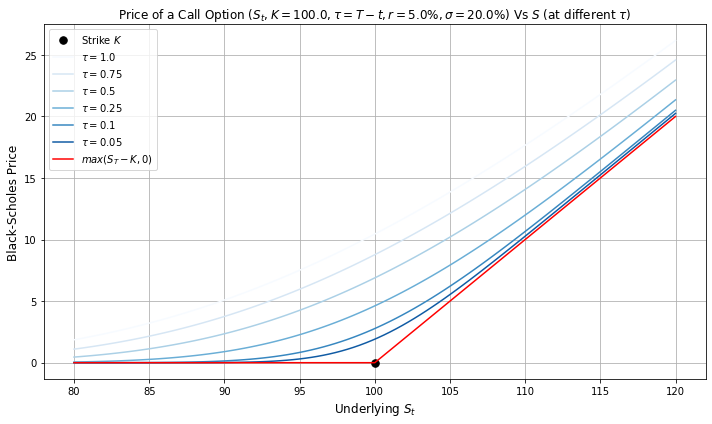

In [57]:
plot_price_strip(S_strip, K, tau_strip, short_rate, volatility)

In [58]:
tau = 2.0

K_focus = 5

S_strip_focus = np.linspace(0, 10, 100)
S_strip_focus = np.append(S_strip_focus, K_focus)
S_strip_focus = np.sort(S_strip_focus)
S_strip_focus

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.        ,  5.05050505,  5.15151515,  5.25252525,  5.35353535,
        5.45454545,  5.55555556,  5.65656566,  5.75757576,  5.85858586,
        5.95959596,  6.06060606,  6.16161616,  6.26262626,  6.36363636,
        6.46464646,  6.56565657,  6.66666667,  6.76767677,  6.86

In [59]:
def plot_price(S_list, K, tau, r, sigma):
    """
    plot_price(S_list, tau_strip) plot call option prices for underlying in 'S_list' at time to maturity 'tau'.

    Parameters:
        S_list (List): list of underlying values;
        K (float):     strike price
        tau (float):   time to maturity (in years);
        r (float):     continuously compounded short-rate;
        sigma (float): volatility of underlying asset;
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, price, lower limit for different underlying values
    ax.plot(S_list, [call_upper_limit(S) for S in S_list],                    
            'k-.', lw=1.5, label=r"Upper limit: $S_t$")
    ax.plot(S_list, [call_option_price(S, K, tau, r, sigma) for S in S_list], 
            'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, [call_lower_limit(S, K, tau, short_rate) for S in S_list], 
            'k--', lw=1.5, label=r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$")

    # plot the red payoff line for different underlying values
    ax.plot(S_list, [call_option_payoff(S, K) for S in S_list], 
            'r-', lw=1.5, label="$max(S_T - K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t={}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(K, tau, r*100, sigma*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

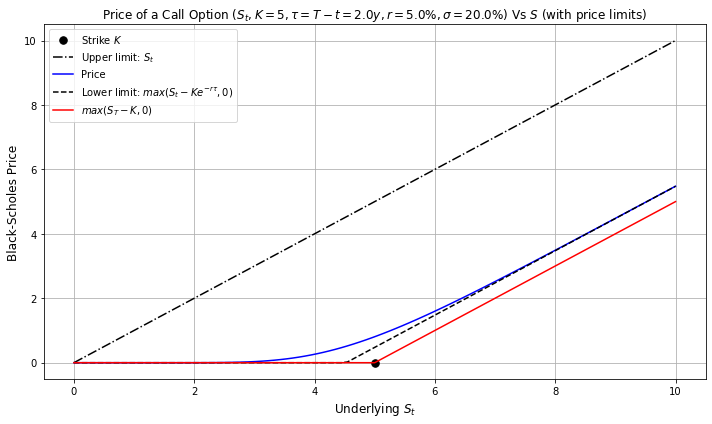

In [60]:
plot_price(S_strip_focus, K_focus, tau, short_rate, volatility)

### With OOP: the `BSCall` class <a name="bscall"></a> 

In [61]:
class CallOption(object):
    """
    CallOption class implementing payoff and pricing of a european call option.
    
    Attributes:
    -----------
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------                        
        payoff: float
            Computes the payoff of the option and returns it
            
        price_upper_limit: float 
            Returns the upper limit for a vanilla call option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla call option price.

        price: float
            Computes the exact price of the option and returns it

    """
    
    # constructor
    def __init__(self, S_t, K, t, T, r, sigma):
        self.S     = S_t
        self.K     = K
        self.t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.tau   = self.__time_to_maturity()
        self.r     = r
        self.sigma = sigma
        
    # string representation
    def __repr__(self):
        return r"CallOption(S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.S, self.K, self.t.strftime("%d-%m-%Y"), self.T.strftime("%d-%m-%Y"), self.tau, 
                       self.r*100, self.sigma*100)
      
    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.T - self.t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        return max(0.0, self.S - self.K)
    
    # upper price limit
    def price_upper_limit(self):
        return self.S

    # lower price limit
    def price_lower_limit(self):
        return max(self.S - self.K*np.exp(-self.r * self.tau), 0)

    # price calculation
    def price(self):
        
        if self.S == 0: # this is to avoid log(0) issues
            return 0.0
        else:

            d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.tau) / (self.sigma * np.sqrt(self.tau))
            d2 = d1 - self.sigma * np.sqrt(self.tau)

            price = self.S * stats.norm.cdf(d1, 0.0, 1.0) - self.K * np.exp(-self.r * self.tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price    

In [62]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [63]:
call

CallOption(S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [64]:
type(call)

__main__.CallOption

In [65]:
call.S

90.0

In [66]:
call.K

100.0

In [67]:
call.T

datetime.datetime(2020, 12, 31, 0, 0)

In [68]:
call.tau

0.7013698630136986

In [69]:
call.payoff()

0.0

In [70]:
call.price()

3.487402470943657

In [71]:
call.price_upper_limit()

90.0

In [72]:
call.price_lower_limit()

0

In [73]:
max(call.S - call.K*np.exp(-call.r * call.tau), 0)

0

In [74]:
def plot_price_strip(option, S_list, tau_list):
    """
    plot_price_strip(option, S_list, tau_list) plot option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau_list (List):     list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(option.K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.tau = tau_list[i] # reset of time-to-maturity
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.S = S_list[j] # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.tau))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.S = S_list[i] # reset of underlying value
        payoff[i] = option.payoff()

    ax.plot(S_list, payoff, 'r-', lw=1.5, label="$max(S-K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(option.K, option.r, option.sigma), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

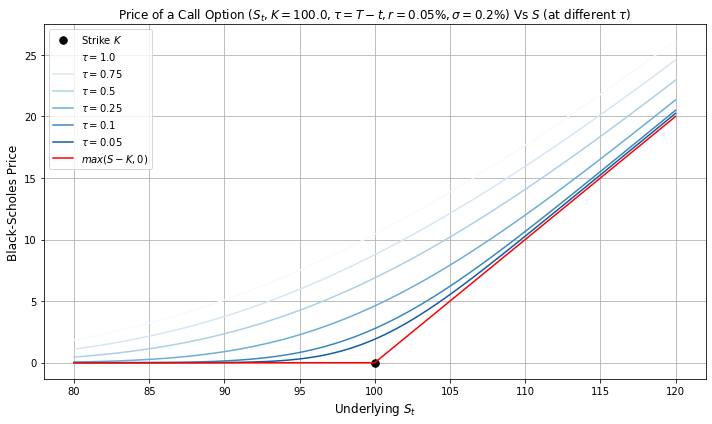

In [75]:
plot_price_strip(call, S_strip, tau_strip)

In [76]:
def plot_price(option, S_list, tau):
    """
    plot_price(option, S_list, tau) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau (float):         time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # setting legend labels
    upper_limit_label = r"Upper limit: $S_t$"
    payoff_label      =r"$max(S-K, 0)$"
    lower_limit_label = r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
        
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.S = S_list[i] # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=upper_limit_label)
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=lower_limit_label)
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=payoff_label)

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(option.K, option.tau, option.r*100, option.sigma*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [77]:
call_focus = CallOption(S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

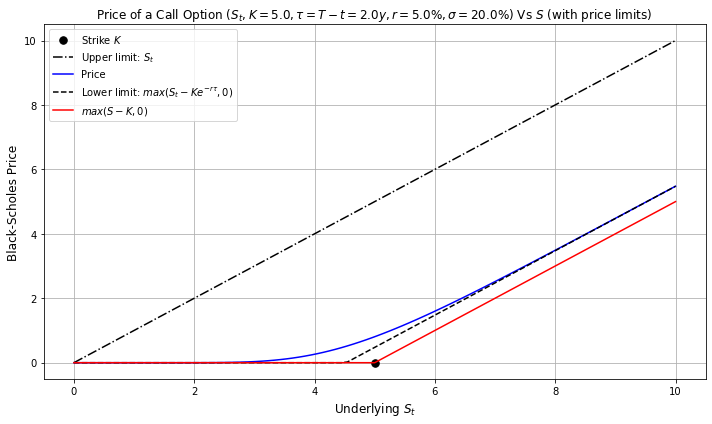

In [78]:
plot_price(call_focus, S_strip_focus, call_focus.tau)

in plotter `S` and `tau` attributes have been intentionally changed. But this might be something error prone.. name hiding

In [79]:
class CallOption(object):
    """
    CallOption class implementing payoff and pricing of a european call option.
    
    Attributes:
    -----------
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------            
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla call option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla call option price.
            
        price: float
            Computes the exact price of the option and returns it

    """
    
    def __init__(self, S_t, K, t, T, r, sigma):
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
    def __repr__(self):
        return r"CallOption(S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    # setters
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.__time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        return max(0.0, self.get_S() - self.get_K())

    # upper price limit
    def price_upper_limit(self):
        return self.get_S()

    # lower price limit
    def price_lower_limit(self):
        return max(self.get_S() - self.get_K()*np.exp(-self.get_r() * self.get_tau()), 0)
    
    # price calculation
    def price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        else:
            K     = self.get_K()
            tau   = self.get_tau()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price    

In [80]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [81]:
call

CallOption(S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [82]:
type(call)

__main__.CallOption

In [83]:
isinstance(call, CallOption)

True

In [84]:
# Raises: AttributeError: 'CallOption' object has no attribute '__S'
#
#call.__S

In [85]:
call.get_S()

90.0

In [86]:
call.set_S(105)

In [87]:
call.get_S()

105

In [88]:
call.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [89]:
call.get_T()

datetime.datetime(2020, 12, 31, 0, 0)

In [90]:
call.get_tau()

0.7013698630136986

In [91]:
call.set_t("01-06-2020")

In [92]:
call.get_t()

datetime.datetime(2020, 6, 1, 0, 0)

In [93]:
# Raises: AttributeError: 'CallOption' object has no attribute '__update_tau'
#
# call.__update_tau()

In [94]:
call.get_tau() # tau gets updated automatically

0.5835616438356165

In [95]:
(call.get_T() - call.get_t()).days / 365 # consistency check

0.5835616438356165

In [96]:
call.set_tau(1.0)

In [97]:
call.get_tau()

1.0

In [98]:
# Raises: AttributeError: 'CallOption' object has no attribute '__update_T'
#
# call.__update_T()

In [99]:
call.get_T() # expiration date gets updated automatically

datetime.datetime(2021, 6, 1, 0, 0)

In [100]:
(call.get_T() - call.get_t()).days / 365 # consistency check

1.0

In [101]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [102]:
call

CallOption(S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [103]:
def plot_price_strip(option, S_list, tau_list):
    """
    plot_price_strip(option, S_list, tau_list) plot option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau_list (List):     list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.set_tau(tau_list[i]) # reset the time to maturity
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.set_S(S_list[j]) # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.get_tau()))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        payoff[i] = option.payoff()

    ax.plot(S_list, payoff, 'r-', lw=1.5, label="$max(S-K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(option.get_K(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

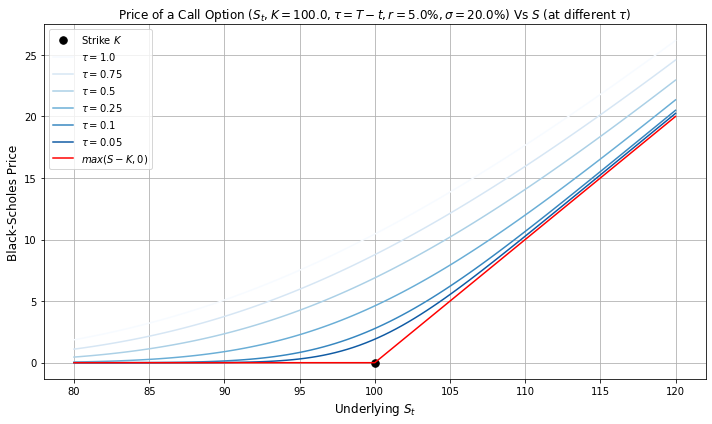

In [104]:
plot_price_strip(call, S_strip, tau_strip)

In [105]:
def plot_price(option, S_list, tau):
    """
    plot_price(option, S_list, tau_list) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau (float):         time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # setting legend labels
    upper_limit_label = r"Upper limit: $S_t$"
    payoff_label      =r"$max(S - K, 0)$"
    lower_limit_label = r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
        
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=upper_limit_label)
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=lower_limit_label)
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=payoff_label)

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(option.get_K(), option.get_tau(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [106]:
call_focus = CallOption(S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

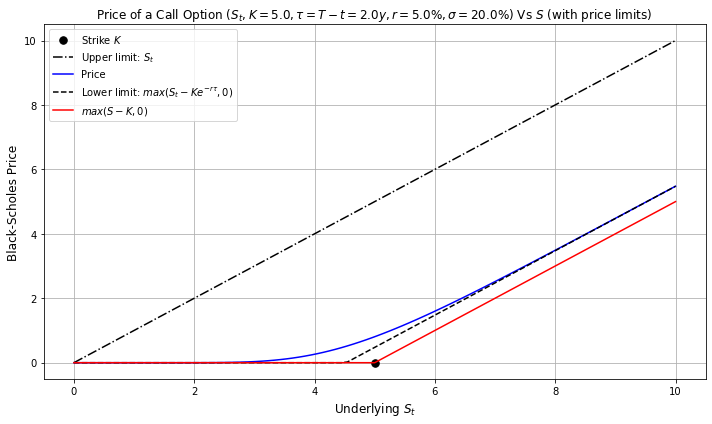

In [107]:
plot_price(call_focus, S_strip_focus, call_focus.get_tau())

Put options (also info labels)

In [108]:
class PlainVanillaOption(object):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all attributes
        
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    def __init__(self, option_type, S_t, K, t, T, r, sigma):

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_type(self):
        return self.__type
    
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label]    
    
    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.__time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity calculation
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        # call case
        if self.get_type() == 'call':
            return max(0.0, self.get_S() - self.get_K())
        # put case
        else:
            return max(0.0, self.get_K() - self.get_S())

    # upper price limit
    def price_upper_limit(self):
        # call case
        if self.get_type() == 'call':
            return self.get_S()
        # put case
        else:
            return self.get_K()*np.exp(-self.get_r() * self.get_tau())

    # lower price limit
    def price_lower_limit(self):
        # call case
        if self.get_type() == 'call':
            return max(self.get_S() - self.get_K()*np.exp(-self.get_r() * self.get_tau()), 0)
        # put case
        else:
            return max(self.get_K()*np.exp(-self.get_r() * self.get_tau()) - self.get_S(), 0)
            
    # price calculation
    def price(self):
        # call case
        if self.get_type() == 'call':
            return self.__call_price()
        # put case
        else:
            return self.put_price()
          
    def __call_price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        else:
            K     = self.get_K()
            tau   = self.get_tau()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price() + self.get_K() * np.exp(- self.get_r() * self.get_tau()) - self.get_S()        

In [109]:
call = PlainVanillaOption(option_type='call', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [110]:
type(call)

__main__.PlainVanillaOption

In [111]:
isinstance(call, PlainVanillaOption)

True

In [112]:
call.price()

3.487402470943657

In [113]:
put = PlainVanillaOption(option_type='put', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
put

PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [114]:
type(call)

__main__.PlainVanillaOption

In [115]:
isinstance(call, PlainVanillaOption)

True

In [116]:
put.price()

AttributeError: 'PlainVanillaOption' object has no attribute 'put_price'

In [ ]:
put.payoff()

In [ ]:
# Raises: NotImplementedError: Option Type: 'other' does not exist!
#
# PlainVanillaOption(option_type='other', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [ ]:
def plot_price_strip(option, S_list, tau_list):
    """
    plot_price_strip(option, S_list, tau_list) plot option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        option (PlainVanillaOption): instance of PlainVanillaOption class;
        S_list (List):               list of underlying values;
        tau_list (List):             list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
        
    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.set_tau(tau_list[i]) # reset of time to maturity
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.set_S(S_list[j]) # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.get_tau()))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        payoff[i] = option.payoff()

    ax.plot(S_list, payoff, 'r-', lw=1.5, label=option.get_docstring('payoff'))

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(option.get_type(), option.get_K(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)
        
    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [ ]:
call = PlainVanillaOption(option_type='call', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
call

In [ ]:
plot_price_strip(call, S_strip, tau_strip)

In [ ]:
put = PlainVanillaOption(option_type='put', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
put

In [ ]:
plot_price_strip(put, S_strip, tau_strip)

In [ ]:
def plot_price(option, S_list, tau):
    """
    plot_price(option, S_list, tau) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (PlainVanillaOption): instance of PlainVanillaOption class;
        S_list (List):               list of underlying values;
        tau (float):                 time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=option.get_docstring('price_upper_limit'))
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=option.get_docstring('price_lower_limit'))
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=option.get_docstring('payoff'))

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(option.get_type(), option.get_K(), option.get_tau(), option.get_r()*100, option.get_sigma()*100), 
                 fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [ ]:
call_focus = PlainVanillaOption(option_type='call', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

In [ ]:
plot_price(call_focus, S_strip_focus, call_focus.get_tau())

In [ ]:
put_focus = PlainVanillaOption(option_type='put', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

In [ ]:
plot_price(put_focus, S_strip_focus, put_focus.get_tau())

this cross is due to interest rates. In nowadays scenarios, rates are typically extremely low (when not negative). Let's see that the crossing disappears for $r=0$

In [ ]:
call_focus_zero_rates = PlainVanillaOption(option_type='call', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.0, sigma=0.2)

In [ ]:
plot_price(call_focus_zero_rates, S_strip_focus, call_focus_zero_rates.get_tau())

In [ ]:
put_focus_zero_rates = PlainVanillaOption(option_type='put', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.0, sigma=0.2)

In [ ]:
plot_price(put_focus_zero_rates, S_strip_focus, put_focus_zero_rates.get_tau())

Nothing is preventing us to consider even negative rates, as is common nowday. Let's use a unrealistic $r = -5\%$ just to magnify the result graphically.

In [ ]:
call_focus_negative_rates = PlainVanillaOption(option_type='call', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=-0.05, sigma=0.2)

In [ ]:
plot_price(call_focus_negative_rates, S_strip_focus, call_focus_negative_rates.get_tau())

In [ ]:
put_focus_negative_rates = PlainVanillaOption(option_type='put', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=-0.05, sigma=0.2)

In [ ]:
plot_price(put_focus_negative_rates, S_strip_focus, put_focus_negative_rates.get_tau())

Let's now implement an analogous class for Cash-Or-Nothing Digital calls and puts (aka Binary).

In [ ]:
class DigitalOption(object):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        Q (float):                cash amount
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all attributes
        
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a CON digital option price.

        price_lower_limit: float 
            Returns the lower limit for a CON digital option price
            .
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    def __init__(self, option_type, cash_amount, S_t, K, t, T, r, sigma):

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__Q     = cash_amount
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_type(self):
        return self.__type
    
    def get_Q(self):
        return self.__Q
    
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label]    
    
    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
    
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
        
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.__time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        # call case
        if self.get_type() == 'call':
            return self.get_Q() * int(self.get_S() > self.get_K())
        # put case
        else:
            return self.get_Q() * int(self.get_S() <= self.get_K())
        
    # upper price limit
    def price_upper_limit(self):
        # call case
        if self.get_type() == 'call':
            return self.get_Q()*np.exp(-self.get_r() * self.get_tau())
        # put case
        else:
            return self.get_Q()*np.exp(-self.get_r() * self.get_tau())

    # lower price limit
    def price_lower_limit(self):
        # call case
        if self.get_type() == 'call':
            return 0.0
        # put case
        else:
            return 0.0
        
    # price calculation
    def price(self):
        # call case
        if self.get_type() == 'call':
            return self.__call_price()
        # put case
        else:
            return self.put_price()
          
    def __call_price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            tau   = self.get_tau()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * self.get_tau()) - self.__call_price()        

In [ ]:
CON_Call = DigitalOption(option_type='call', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Call

In [ ]:
type(CON_Call)

In [ ]:
isinstance(CON_Call, DigitalOption)

In [ ]:
CON_Call.price()

In [ ]:
CON_Put = DigitalOption(option_type='put', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Put

In [ ]:
type(CON_Put)

In [ ]:
isinstance(CON_Put, DigitalOption)

In [ ]:
CON_Put.price()

In [ ]:
CON_Put.payoff()

In [ ]:
def plot_price_strip(option, S_list, tau_list):
    """
    plot_price_strip(option, S_list, tau_list) plot Plain-Vanilla or Cash-Or-Nothing option prices for underlying and 
    maturities in 'S_list' and 'tau_list', respectively.

    Parameters:
        option (PlainVanillaOption; DigitalOption): instance of PlainVanillaOption or DigitalOption class;
        S_list (List):                              list of underlying values;
        tau_list (List):                            list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))
    
    # setting legend labels
    # plain vanilla case:
    if isinstance(option, PlainVanillaOption):
        title_label = "Plain Vanilla"
    # digital case:
    else:
        title_label = "Cash-Or-Nothing ($Q={}$)".format(option.get_Q())

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.set_tau(tau_list[i])
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.set_S(S_list[j]) # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.get_tau()))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        payoff[i] = option.payoff()
    
    ax.plot(S_list, payoff, 'r-',  lw=1.5, label=option.get_docstring('payoff'))
    
    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} {} Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(title_label, option.get_type(), option.get_K(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)
        
    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [ ]:
CON_Call = DigitalOption(option_type='call', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Call

In [ ]:
plot_price_strip(CON_Call, S_strip, tau_strip)

In [ ]:
CON_Put = DigitalOption(option_type='put', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Put

In [ ]:
plot_price_strip(CON_Put, S_strip, tau_strip)

In [ ]:
def plot_price(option, S_list, tau):
    """
    plot_price(option, S_list, tau) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (PlainVanillaOption): instance of PlainVanillaOption class;
        S_list (List):               list of underlying values;
        tau (float):                 time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # setting legend labels
    # plain vanilla case:
    if isinstance(option, PlainVanillaOption):
        title_label = "Plain Vanilla"
    # digital case:
    else:
        title_label = "Cash-Or-Nothing ($Q={}$)".format(option.get_Q())
            
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=option.get_docstring('price_upper_limit'))
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=option.get_docstring('price_lower_limit'))
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=option.get_docstring('payoff'))

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} {} Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(title_label, option.get_type(), option.get_K(), option.get_tau(), option.get_r()*100, 
                        option.get_sigma()*100), fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [ ]:
CON_Call_focus = DigitalOption(option_type='call', 
                               cash_amount=1.0, 
                               S_t=3.0, 
                               K=5.0, 
                               t="19-04-2020", 
                               T="19-04-2022", 
                               r=0.05, 
                               sigma=0.2)

CON_Call_focus

In [ ]:
plot_price(CON_Call_focus, S_strip_focus, CON_Call_focus.get_tau())

In [ ]:
CON_Put_focus = DigitalOption(option_type='put', 
                               cash_amount=1.0, 
                               S_t=3.0, 
                               K=5.0, 
                               t="19-04-2020", 
                               T="19-04-2022", 
                               r=0.05, 
                               sigma=0.2)

CON_Put_focus

In [ ]:
plot_price(CON_Put_focus, S_strip_focus, CON_Put_focus.get_tau())

# Inheritance and polymorphism

- A PlainVanillaOption _is a_ EuropeanOption
- A DigitalOption _is a_ EuropeanOption

In [ ]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all common attributes
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.

    """
    
    def __init__(self, option_type, S_t, K, t, T, r, sigma):
        
        print("Calling the EuropeanOption constructor!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type
        
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.__time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()     

In [ ]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    # initializer with default arguments
    def __init__(self, option_type='call', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2):    
        # calling the EuropeanOption constructor
        super(PlainVanillaOption, self).__init__(option_type, S_t, K, t, T, r, sigma)
        
        # additional stuff - PlainVanillaOption-specific

        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation
    def payoff(self):
        # call case
        if self.get_type() == 'call':
            return max(0.0, self.get_S() - self.get_K())
        # put case
        else:
            return max(0.0, self.get_K() - self.get_S())

    # upper price limit
    def price_upper_limit(self):
        # call case
        if self.get_type() == 'call':
            return self.get_S()
        # put case
        else:
            return self.get_K()*np.exp(-self.get_r() * self.get_tau())

    # lower price limit
    def price_lower_limit(self):
        # call case
        if self.get_type() == 'call':
            return max(self.get_S() - self.get_K()*np.exp(-self.get_r() * self.get_tau()), 0)
        # put case
        else:
            return max(self.get_K()*np.exp(-self.get_r() * self.get_tau()) - self.get_S(), 0)
            
    # price calculation
    def price(self):
        # call case
        if self.get_type() == 'call':
            return self.__call_price()
        # put case
        else:
            return self.put_price()
          
    def __call_price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        else:
            K     = self.get_K()
            tau   = self.get_tau()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price() + self.get_K() * np.exp(- self.get_r() * self.get_tau()) - self.get_S()        

In [ ]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        Q (float):                cash amount
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getter and setter for cash amount attribute
        
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a CON digital option price.

        price_lower_limit: float 
            Returns the lower limit for a CON digital option price
            .
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    # initializer with default arguments    
    def __init__(self, option_type='call', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2):
        # calling the EuropeanOption constructor
        super(DigitalOption, self).__init__(option_type, S_t, K, t, T, r, sigma)        

        # additional stuff - DigitalOption-specific
        self.__Q = cash_amount
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_Q(self):
        return self.__Q
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation
    def payoff(self):
        # call case
        if self.get_type() == 'call':
            return self.get_Q() * int(self.get_S() > self.get_K())
        # put case
        else:
            return self.get_Q() * int(self.get_S() <= self.get_K())
        
    # upper price limit
    def price_upper_limit(self):
        # call case
        if self.get_type() == 'call':
            return self.get_Q()*np.exp(-self.get_r() * self.get_tau())
        # put case
        else:
            return self.get_Q()*np.exp(-self.get_r() * self.get_tau())

    # lower price limit
    def price_lower_limit(self):
        # call case
        if self.get_type() == 'call':
            return 0.0
        # put case
        else:
            return 0.0
        
    # price calculation
    def price(self):
        # call case
        if self.get_type() == 'call':
            return self.__call_price()
        # put case
        else:
            return self.put_price()
          
    def __call_price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            tau   = self.get_tau()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * self.get_tau()) - self.__call_price()        

In [ ]:
Vanilla_Call = PlainVanillaOption()
Vanilla_Call

In [ ]:
type(Vanilla_Call)

In [ ]:
isinstance(Vanilla_Call, PlainVanillaOption)

In [ ]:
Vanilla_Call.get_K()

In [ ]:
Vanilla_Call.price()

In [ ]:
plot_price_strip(Vanilla_Call, S_strip, tau_strip)

In [ ]:
plot_price(Vanilla_Call, S_strip, Vanilla_Call.get_tau())

In [ ]:
Vanilla_Put = PlainVanillaOption(option_type='put', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
Vanilla_Put

which is equivalent to

In [ ]:
Vanilla_Put = PlainVanillaOption(option_type='put')
Vanilla_Put

In [ ]:
type(Vanilla_Put)

In [ ]:
isinstance(Vanilla_Put, PlainVanillaOption)

In [ ]:
Vanilla_Put.get_K()

In [ ]:
Vanilla_Put.price()

In [ ]:
Vanilla_Put.payoff()

In [ ]:
plot_price_strip(Vanilla_Put, S_strip, tau_strip)

In [ ]:
plot_price(Vanilla_Put, S_strip, Vanilla_Put.get_tau())

let's now instantiate a digital option

In [ ]:
CON_Call = DigitalOption()
CON_Call

In [ ]:
type(CON_Call)

In [ ]:
isinstance(CON_Call, DigitalOption)

In [ ]:
CON_Call.get_K()

In [ ]:
CON_Call.get_Q()

In [ ]:
CON_Call.price()

In [ ]:
plot_price_strip(CON_Call, S_strip, tau_strip)

In [ ]:
plot_price(CON_Call, S_strip, CON_Call.get_tau())

In [ ]:
CON_Put = DigitalOption(option_type='put', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Put

equivalent to

In [ ]:
CON_Put = DigitalOption(option_type='put')
CON_Put

In [ ]:
type(CON_Put)

In [ ]:
isinstance(CON_Put, DigitalOption)

In [ ]:
CON_Put.get_K()

In [ ]:
CON_Put.get_Q()

In [ ]:
CON_Put.price()

In [ ]:
CON_Put.payoff()

In [ ]:
plot_price_strip(CON_Put, S_strip, tau_strip)

In [ ]:
plot_price(CON_Put, S_strip, CON_Put.get_tau())

## `*args` and `**kwargs`

In [ ]:
def print_args(*args):
    for arg in args:
        print(arg)

def print_kwargs(**kwargs):
    for k, v in kwargs.items():
        print("%s: %s" % (k, v))

In [ ]:
print_args("one", "two", "three")

In [ ]:
print_args("one", "two", "three", "four")

In [ ]:
print_kwargs(name="Jane", surname="Doe")

In [ ]:
print_kwargs(age=10)

# Polymorphism application: a `Plotter()` class

First let's define a common MarketEnvironment class which shall contain the information on market environment and underlying level. This class will be used to instantiate the EuropeanOption class

In [ ]:
class MarketEnvironment:
    """
    MarketEnvironment class: setting the market environment: date, underlying level, volatility level and short-rate.
    
    Attributes:
    -----------
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        r (float):                continuously compounded short-rate;
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        sigma (float):            volatility of underlying asset;
    
    Methods:
    --------   
    
        getters and setters for all attributes
    """
    
    def __init__(self, t="19-04-2020", r=0.05, S_t=90.0, sigma=0.2):
        
        print("Initializing the MarketEnvironment!")
        
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__r     = r
        self.__S     = S_t
        self.__sigma = sigma

    # getters
    def get_t(self):
        return self.__t

    def get_r(self):
        return self.__r

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    # setters 
    def set_t(self, t):
        # notice that there is no need to update the time-to-maturity of the options,
        # since in this way of modeling, the MarketEnvironment is the first thing that gets instantiated.
        # Financial instruments follow.
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t

    def set_r(self, r):
        self.__r = r

    def set_S(self, S):
        self.__S = S
        
    def set_sigma(self, sigma):
        self.__sigma = sigma

In [ ]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        S_t (float):              spot price of the underlying asset at the valuation date 't'. From MarketEnvironment.
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. From MarketEnvironment.
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate. From MarketEnvironment.
        sigma (float):            volatility of underlying asset. From MarketEnvironment.
    
    Public Methods:
    --------   
    
        getters and setters for all common attributes
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.

    """

    def __init__(self, market_environment, option_type='call', K=100.0, T="31-12-2020"):
        
        print("Initializing the EuropeanOption!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = market_environment.get_S()
        self.__K     = K
        self.__t     = market_environment.get_t()
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = market_environment.get_r()
        self.__sigma = market_environment.get_sigma()
        
        
        %%%%%%%%%%%
        % il PROBLEMA SONO I GET. GET_R() E' USATO DAL .PRICE()... FORSE DA RIDEFINIRE IL GET_R ANCHE NELLA EUROPEAN OPTION
        %%%%%%%%%%%
    
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type
        
    def get_K(self):
        return self.__K
    
    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_K(self, K):
        self.__K = K
    
    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        self.__update_T()
        
    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()     

In [ ]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    # initializer with default arguments
    def __init__(self, option_type='call', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2):    
        # calling the EuropeanOption constructor
        super(PlainVanillaOption, self).__init__(option_type, S_t, K, t, T, r, sigma)
        
        # additional stuff - PlainVanillaOption-specific

        # informations dictionary
        self.__docstring_dict = {
            'info': r"CON {} (K={:.1f}, tau={:.2f}y)".format(self.get_type(), 
                                                                       self.get_K(), 
                                                                       self.get_tau()),
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation - with optional keyword parameters
    def payoff(self, **kwargs):
        
        S = self.get_S() if 'S' not in kwargs else kwargs['S']
                
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)
    
    def __call_payoff(self, S):
        if isinstance(S, list):
            return [max(0.0, s - self.get_K()) for s in S]
        else:
            return max(0.0, S - self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, list):
            return [max(0.0, self.get_K() - s) for s in S]
        else:
            return max(0.0, self.get_K() - S)
        
    # upper price limit - with optional keyword parameters
    def price_upper_limit(self, **kwargs):

        S = self.get_S() if 'S' not in kwargs else kwargs['S']
        tau = self.get_tau() if 'tau' not in kwargs else kwargs['tau']
                        
        # call case
        if self.get_type() == 'call':
            return S
        # put case
        else:
            return self.__put_price_upper_limit(S, tau)
    
    def __put_price_upper_limit(self, S, tau):
        if isinstance(S, list):
            return [self.get_K()*np.exp(-self.get_r() * tau)] * len(S) # list repeated len(S) times
        else:
            return self.get_K()*np.exp(-self.get_r() * tau)

    # lower price limit - with optional keyword parameters
    def price_lower_limit(self, **kwargs):

        S = self.get_S() if 'S' not in kwargs else kwargs['S']
        tau = self.get_tau() if 'tau' not in kwargs else kwargs['tau']
                                       
        # call case
        if self.get_type() == 'call':
            return self.__call_price_lower_limit(S, tau)
        # put case
        else:
            return self.__put_price_lower_limit(S, tau)

    def __call_price_lower_limit(self, S, tau):
        if isinstance(S, list):
            return [max(S - self.get_K()*np.exp(-self.get_r() * tau), 0.0) for s in S]
        else:
            return max(S - self.get_K()*np.exp(-self.get_r() * tau), 0.0)
                                       
    def __put_price_lower_limit(self, S, tau):
        if isinstance(S, list):
            return [max(self.get_K()*np.exp(-self.get_r() * tau) - s, 0.0) for s in S]
        else:
            return max(self.get_K()*np.exp(-self.get_r() * tau) - S, 0.0)
                                       
    # price calculation - with optional keyword parameters
    def price(self, **kwargs):
                       
        S = self.get_S() if 'S' not in kwargs else kwargs['S']
        tau = self.get_tau() if 'tau' not in kwargs else kwargs['tau']
                       
        # call case
        if self.get_type() == 'call':
            return [self.__call_price(s, tau) for s in S] if isinstance(S, list) else self.__call_price(S, tau)
        # put case
        else:
            return [self.__put_price(s, tau) for s in S] if isinstance(S, list) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price(S, tau) + self.get_K() * np.exp(- self.get_r() * tau) - S       

In [ ]:
Vanilla_Call = PlainVanillaOption()
Vanilla_Call

In [ ]:
Vanilla_Call.price()

In [ ]:
Vanilla_Call.price(S=[95, 110], tau=0.1)

In [ ]:
Vanilla_Call.payoff()

In [ ]:
Vanilla_Call.payoff(S=[95, 110])

In [ ]:
Vanilla_Call.price_upper_limit()

In [ ]:
Vanilla_Call.price_upper_limit(S=[95, 110])

In [ ]:
Vanilla_Call.price_lower_limit()

In [ ]:
Vanilla_Call.price_upper_limit(S=[95, 110])

In [ ]:
Vanilla_Put = PlainVanillaOption(option_type='put')
Vanilla_Put

In [ ]:
Vanilla_Put.price()

In [ ]:
Vanilla_Put.price(S=[95, 110], tau=0.1)

In [ ]:
Vanilla_Put.payoff()

In [ ]:
Vanilla_Put.payoff(S=[95, 110])

In [ ]:
Vanilla_Put.price_upper_limit()

In [ ]:
Vanilla_Put.price_upper_limit(S=[95, 110])

In [ ]:
Vanilla_Put.price_lower_limit()

In [ ]:
Vanilla_Put.price_upper_limit(S=[95, 110])

In [ ]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        Q (float):                cash amount
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getter and setter for cash amount attribute
        
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a CON digital option price.

        price_lower_limit: float 
            Returns the lower limit for a CON digital option price
            .
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    # initializer with default arguments    
    def __init__(self, option_type='call', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2):
        # calling the EuropeanOption constructor
        super(DigitalOption, self).__init__(option_type, S_t, K, t, T, r, sigma)        

        # additional stuff - DigitalOption-specific
        self.__Q = cash_amount
        
        # informations dictionary
        self.__docstring_dict = {
            'info': r"CON {} (K={:.1f}, tau={:.2f}y, Q={:.1f})".format(self.get_type(), 
                                                                       self.get_K(), 
                                                                       self.get_tau(), 
                                                                       self.get_Q()),
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_Q(self):
        return self.__Q
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation - with optional keyword parameters
    def payoff(self, **kwargs):
        
        S = self.get_S() if 'S' not in kwargs else kwargs['S']
            
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)

    def __call_payoff(self, S):
        if isinstance(S, list):
            return [self.get_Q() * int(s > self.get_K()) for s in S]
        else:
            return self.get_Q() * int(S > self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, list):
            return [self.get_Q() * int(s <= self.get_K()) for s in S]
        else:
            return self.get_Q() * int(S <= self.get_K())
        
    # upper price limit - with optional keyword parameters
    def price_upper_limit(self, **kwargs):

        S = self.get_S() if 'S' not in kwargs else kwargs['S']
        tau = self.get_tau() if 'tau' not in kwargs else kwargs['tau']
            
        # the same for call and put
        return self.__price_upper_limit(S, tau)
 
    def __price_upper_limit(self, S, tau):
        if isinstance(S, list):
            return [self.get_Q()*np.exp(-self.get_r() * tau)]*len(S)
        else:
            return self.get_Q()*np.exp(-self.get_r() * tau)
                                       
    # lower price limit - with optional keyword parameters
    def price_lower_limit(self, **kwargs):

        S = self.get_S() if 'S' not in kwargs else kwargs['S']
            
        # call case
        if self.get_type() == 'call':
            return [0.0]*len(S) if isinstance(S, list) else 0.0
        # put case
        else:
            return [0.0]*len(S) if isinstance(S, list) else 0.0
        
    # price calculation - with optional keyword parameters
    def price(self, **kwargs):

        S = self.get_S() if 'S' not in kwargs else kwargs['S']
        tau = self.get_tau() if 'tau' not in kwargs else kwargs['tau']
            
        # call case
        if self.get_type() == 'call':
            return [self.__call_price(s, tau) for s in S] if isinstance(S, list) else self.__call_price(S, tau)
        # put case
        else:
            return [self.__put_price(s, tau) for s in S] if isinstance(S, list) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
                
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * tau) - self.__call_price(S, tau)        

In [ ]:
CON_Call = DigitalOption()
CON_Call

In [ ]:
CON_Call.price()

In [ ]:
CON_Call.price(S=[95, 110], tau=0.1)

In [ ]:
CON_Call.payoff()

In [ ]:
CON_Call.payoff(S=[95, 110])

In [ ]:
CON_Call.price_upper_limit()

In [ ]:
CON_Call.price_upper_limit(S=[95, 110])

In [ ]:
CON_Call.price_upper_limit(tau=0.1)

In [ ]:
CON_Call.price_upper_limit(S=[95, 110], tau=0.1)

using kwargs, the order doesn't matter

In [ ]:
CON_Call.price_upper_limit(tau=0.1, S=[95, 110])

In [ ]:
CON_Call.price_lower_limit()

In [ ]:
CON_Call.price_upper_limit(S=[95, 110])

In [ ]:
CON_Put = DigitalOption(option_type='put', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Put

In [ ]:
CON_Put.price()

In [ ]:
CON_Put.price(S=[95, 110], tau=0.1)

In [ ]:
CON_Put.payoff()

In [ ]:
CON_Put.payoff(S=[95, 110])

In [ ]:
CON_Put.price_upper_limit()

In [ ]:
CON_Put.price_upper_limit(S=[95, 110])

In [ ]:
CON_Put.price_upper_limit(tau=0.1)

In [ ]:
CON_Put.price_upper_limit(S=[95, 110], tau=0.1)

using kwargs, the order doesn't matter

In [ ]:
CON_Put.price_upper_limit(tau=0.1, S=[95, 110])

In [ ]:
CON_Put.price_lower_limit()

In [ ]:
CON_Put.price_upper_limit(S=[95, 110])

Let's now define a Plotter class

In [ ]:
class Plotter():
    
    def __init__(self, FinancialInstrument, **kwargs):
        
        self.fin_inst = FinancialInstrument
        
        self.__S = self.fin_inst.get_S() if 'S' not in kwargs else kwargs['S']
        self.__tau = self.fin_inst.get_tau() if 'tau' not in kwargs else kwargs['tau']
        
        if isinstance(self.__tau, list)
            # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
            plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(self.__tau)+1)))
            
        self.__title_label = self.fin_

def plot_price_strip(self, **kwargs):
    """
    Plot FinancialInstrument values against underlying value(s), possibly at different times-to-maturity.
    """
    
    S = self.__S if 'S' not in kwargs else kwargs['S']
    tau = self.__tau if 'tau' not in kwargs else kwargs['tau']
    
    
    # setting legend labels
    # plain vanilla case:
    if isinstance(option, PlainVanillaOption):
        title_label = "Plain Vanilla"
    # digital case:
    else:
        title_label = "Cash-Or-Nothing ($Q={}$)".format(option.get_Q())

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.set_tau(tau_list[i])
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.set_S(S_list[j]) # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.get_tau()))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        payoff[i] = option.payoff()
    
    ax.plot(S_list, payoff, 'r-',  lw=1.5, label=option.get_docstring('payoff'))
    
    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} {} Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(title_label, option.get_type(), option.get_K(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)
        
    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()
    
#####################################################

def plot_price(option, S_list, tau):
    """
    plot_price(option, S_list, tau) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (PlainVanillaOption): instance of PlainVanillaOption class;
        S_list (List):               list of underlying values;
        tau (float):                 time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # setting legend labels
    # plain vanilla case:
    if isinstance(option, PlainVanillaOption):
        title_label = "Plain Vanilla"
    # digital case:
    else:
        title_label = "Cash-Or-Nothing ($Q={}$)".format(option.get_Q())
            
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=option.get_docstring('price_upper_limit'))
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=option.get_docstring('price_lower_limit'))
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=option.get_docstring('payoff'))

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} {} Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(title_label, option.get_type(), option.get_K(), option.get_tau(), option.get_r()*100, 
                        option.get_sigma()*100), fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

# Composition application: a `Portfolio()` class